<a href="https://colab.research.google.com/github/MrLuksR/Regresion-Lineal-Multiple-Diabetes/blob/main/Regresion_Lineal_Multiple_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df = df.rename(columns={
    'Pregnancies' : 'Preg',
    'BloodPressure' : 'BloodPre',
    'SkinThickness' : 'SkinThick',
    'DiabetesPedigreeFunction' : 'DiabPedFunc'})
df.head()

,Preg,Glucose,BloodPre,SkinThick,Insulin,BMI,DiabPedFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

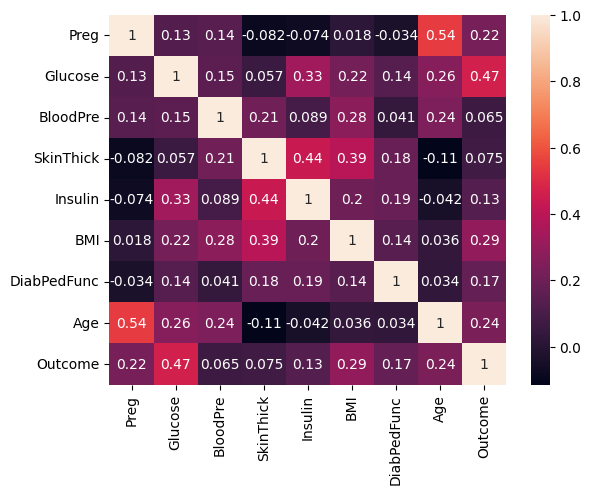

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Preg', 'Glucose', 'BloodPre', 'SkinThick', 'Insulin', 'BMI', 'DiabPedFunc', 'Age', 'Outcome']
sns.heatmap(df[cols].corr(), annot=True)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Variables independientes
X = df[['Age', 'Glucose', 'BMI']].values
# Variables dependientes
Y = df['Outcome'].values.reshape(-1,1)

sx = StandardScaler()
sy = StandardScaler()

X_s = sx.fit_transform(X)
Y_s = sy.fit_transform(Y)

lr = LinearRegression()
lr.fit(X_s, Y_s)

LinearRegression()

In [11]:
import numpy as np

edad = int(input("Edad: "))
glucosa = int(input("Consentracion de glucosa en sangre en 2 horas (mg/dL): "))
imc = float(input("Indice de masa corporal: "))

# Entrada estandarizada
input_s = sx.transform(np.array([[edad, glucosa, imc]]))
# Salida estandarizada
output_s = lr.predict(input_s)

# Salida des-estandarizada
output = sy.inverse_transform(output_s)

print("Probabilidad de padecer Diabetes: ", round(output[0][0] * 100, 2),"%\n")

Edad: 50
Consentracion de glucosa en sangre en 2 horas (mg/dL): 40
Indice de masa corporal: 60
Probabilidad de padecer Diabetes:  31.67 %

